# Profile of A Fatal Crash
## Data Modeling Notebook
## CMSE 202 Group 4 Final Project
- Jeffrey Valentic
- Ian Schneider
- Samantha Petrovich
- Xinyu Zhang

In [195]:
import pandas as pd #Import Pandas
import matplotlib.pyplot as plt #Import Matplotlib
import numpy as np #Import numpy
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Data Importing

The data set we chose had a lot of data that was not directly relevant to the result of someone crashing a car. In the cell below the data was imported, then extraneous values dropped form the set.

In [196]:
cad_df = pd.read_csv('CAD.csv')
cad_df = cad_df.drop("X", axis=1)
cad_df = cad_df.drop("Y", axis=1)
cad_df = cad_df.drop("OBJECTID", axis=1)
cad_df = cad_df.drop("areaUnitID", axis=1)
cad_df = cad_df.drop("bicycle", axis=1)
cad_df = cad_df.drop("bridge", axis=1)
cad_df = cad_df.drop("bus", axis=1)
cad_df = cad_df.drop("carStationWagon", axis=1)
cad_df = cad_df.drop("cliffBank", axis=1)
cad_df = cad_df.drop("crashDirectionDescription", axis=1)
cad_df = cad_df.drop("crashFinancialYear", axis=1)
cad_df = cad_df.drop("crashLocation1", axis=1)
cad_df = cad_df.drop("crashLocation2", axis=1)
cad_df = cad_df.drop("crashRoadSideRoad", axis=1)
cad_df = cad_df.drop("crashSHDescription", axis=1)
cad_df = cad_df.drop("debris", axis=1)
cad_df = cad_df.drop("directionRoleDescription", axis=1)
cad_df = cad_df.drop("ditch", axis=1)
cad_df = cad_df.drop("fence", axis=1)
cad_df = cad_df.drop("flatHill", axis=1)
cad_df = cad_df.drop("guardRail", axis=1)
cad_df = cad_df.drop("houseOrBuilding", axis=1)
cad_df = cad_df.drop("intersection", axis=1)
cad_df = cad_df.drop("kerb", axis=1)
cad_df = cad_df.drop("meshblockId", axis=1)
cad_df = cad_df.drop("objectThrownOrDropped", axis=1)
cad_df = cad_df.drop("otherObject", axis=1)
cad_df = cad_df.drop("otherVehicleType", axis=1)
cad_df = cad_df.drop("overBank", axis=1)
cad_df = cad_df.drop("parkedVehicle", axis=1)
cad_df = cad_df.drop("pedestrian", axis=1)
cad_df = cad_df.drop("phoneBoxEtc", axis=1)
cad_df = cad_df.drop("postOrPole", axis=1)
cad_df = cad_df.drop("region", axis=1)
cad_df = cad_df.drop("roadCharacter", axis=1)
cad_df = cad_df.drop("roadworks", axis=1)
cad_df = cad_df.drop("schoolBus", axis=1)
cad_df = cad_df.drop("strayAnimal", axis=1)
cad_df = cad_df.drop("suv", axis=1)
cad_df = cad_df.drop("taxi", axis=1)
cad_df = cad_df.drop("slipOrFlood", axis=1)
cad_df = cad_df.drop("temporarySpeedLimit", axis=1)
cad_df = cad_df.drop("tlaId", axis=1)
cad_df = cad_df.drop("tlaName", axis=1)
cad_df = cad_df.drop("trafficControl", axis=1)
cad_df = cad_df.drop("trafficIsland", axis=1)
cad_df = cad_df.drop("trafficSign", axis=1)
cad_df = cad_df.drop("train", axis=1)
cad_df = cad_df.drop("tree", axis=1)
cad_df = cad_df.drop("truck", axis=1)
cad_df = cad_df.drop("unknownVehicleType", axis=1)
cad_df = cad_df.drop("waterRiver", axis=1)


In [197]:
cad_df = cad_df.dropna(axis='rows')
cad_df.describe()

,advisorySpeed,crashYear,fatalCount,minorInjuryCount,moped,motorcycle,NumberOfLanes,seriousInjuryCount,speedLimit,vanOrUtility,vehicle
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.0,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,56.229212,2010.157628,0.028923,0.438901,0.0,0.055676,2.027477,0.124367,92.429501,0.092552,0.003615
std,17.063988,6.328080,0.206345,1.082216,0.0,0.295545,0.332682,0.531639,16.327794,0.294859,0.060041
min,15.000000,2000.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000
25%,45.000000,2005.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,100.000000,0.000000,0.000000
50%,55.000000,2010.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.000000,100.000000,0.000000,0.000000
75%,65.000000,2016.000000,0.000000,1.000000,0.0,0.000000,2.000000,0.000000,100.000000,0.000000,0.000000
max,95.000000,2020.000000,3.000000,26.000000,0.0,6.000000,4.000000,14.000000,110.000000,2.000000,1.000000


# Preparing Data For Modeling

In [198]:
# Function to convert text (str) data to int representations.
# Returns a dictionary containing the original
# key that maps to the new integer representation.

def convert_to_int(name):
    keydict = {}
    x = 0
    for i in cad_df[name]:
        if i not in keydict.keys():
            keydict[i] = x
            x += 1
            
    cad_df[name].replace(keydict, inplace=True)
    return keydict

Using the function from the cell above, the various data points with string values were converted into integer values to allow use within models and plots. The original string representations are stored in dictionaries as keys with their integer replacement as the value.

In [199]:
crashSevKey = convert_to_int('crashSeverity')
holidayKey = convert_to_int('holiday')
lightKey = convert_to_int('light')
roadLaneKey = convert_to_int('roadLane')
roadSurfKey = convert_to_int('roadSurface')
streetLightKey = convert_to_int('streetLight')
urbanKey = convert_to_int('urban')
weatherAKey = convert_to_int('weatherA')
weatherBKey = convert_to_int('weatherB')

print("DATA KEYS")
print('----------------------------------------------------------------')
print("Crash Severity Key")
print(crashSevKey)
print('----------------------------------------------------------------')
print("Holiday Key")
print(holidayKey)
print('----------------------------------------------------------------')
print("Light Key")
print(lightKey)
print('----------------------------------------------------------------')
print("Road Lane Key")
print(roadLaneKey)
print('----------------------------------------------------------------')
print("Road Surface Key")
print(roadSurfKey)
print('----------------------------------------------------------------')
print("Street Light Key")
print(streetLightKey)
print('----------------------------------------------------------------')
print("Urban Key")
print(urbanKey)
print('----------------------------------------------------------------')
print("Weather A Key")
print(weatherAKey)
print('----------------------------------------------------------------')
print("Weather B Key")
print(weatherBKey)
print('----------------------------------------------------------------')

DATA KEYS
----------------------------------------------------------------
Crash Severity Key
{'Non-Injury Crash': 0, 'Fatal Crash': 1, 'Minor Crash': 2, 'Serious Crash': 3}
----------------------------------------------------------------
Holiday Key
{'Christmas New Year': 0, 'Labour Weekend': 1, 'Easter': 2, 'Queens Birthday': 3}
----------------------------------------------------------------
Light Key
{'Dark': 0, 'Bright sun': 1, 'Overcast': 2, 'Twilight': 3, 'Unknown': 4}
----------------------------------------------------------------
Road Lane Key
{'2-way': 0, '1-way': 1, 'Off road': 2}
----------------------------------------------------------------
Road Surface Key
{'Sealed': 0, 'Unsealed': 1}
----------------------------------------------------------------
Street Light Key
{'None': 0, 'Null': 1, 'Off': 2, 'On': 3}
----------------------------------------------------------------
Urban Key
{'Open': 0, 'Urban': 1}
----------------------------------------------------------------
W

In the cell below, the column 'fatalCount' was converted to binary format. Any values > 1 were set to 1. Values of 0 were left as is.

In [200]:
cad_df['fatalCount'].replace({2.0:1, 3.0:1, 4.0:1, 5.0:1, 6.0:1, 7.0:1, 8.0:1, 9.0:1}, inplace=True)
print(max(cad_df['fatalCount']))

1.0


Very weak correlation is shown between most of the features of this data set. Urban : Speed Limit contains a negative correlation.

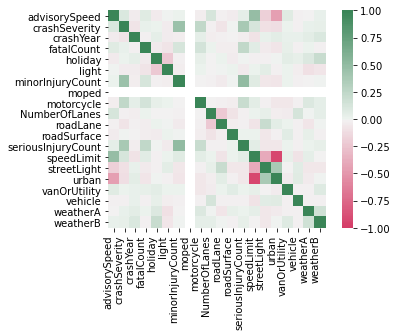

In [201]:
corr = cad_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(1, 500, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

# Building an OLS Model

In [202]:
Y = cad_df['fatalCount']
X = cad_df.loc[:, cad_df.columns != 'fatalCount']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalCount   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     8.649
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.61e-22
Time:                        17:35:39   Log-Likelihood:                 712.14
No. Observations:                1383   AIC:                            -1386.
Df Residuals:                    1364   BIC:                            -1287.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5741      1.279      0.449      0.654      -1.935       3.083
advisorySpeed          0.0006      0.000      2.099      0.036    3.68e-05       0.001
crashSeverity         -0.0198      0.004     -4.636      0.000      -0.028      -0.011
crashYear             -0.0003      0.001     -0.440      0.660      -0.002       0.001
holiday               -0.0082      0.004     -2.322      0.020      -0.015      -0.001
light                 -0.0135      0.004     -3.110      0.002      -0.022      -0.005
minorInjuryCount       0.0091      0.005      2.000      0.046       0.000       0.018
moped               1.351e-15   2.94e-15      0.459      0.646   -4.43e-15    7.13e-15
motorcycle             0.0738      0.014      5.193      0.000       0.046       0.102
NumberOfLanes          0.0038      0.012      0.306      0.760      -0.021       0.028
roadLane              -0.0170      0.025     -0.680      0.497      -0.066       0.032
roadSurface           -0.0244      0.026     -0.939      0.348      -0.075       0.027
seriousInjuryCount     0.0676      0.009      7.604      0.000       0.050       0.085
speedLimit         -3.756e-05      0.001     -0.052      0.958      -0.001       0.001
streetLight           -0.0020      0.005     -0.404      0.687      -0.012       0.008
urban                 -0.0107      0.032     -0.334      0.738      -0.074       0.052
vanOrUtility           0.0215      0.013      1.597      0.111      -0.005       0.048
vehicle               -0.0099      0.066     -0.150      0.881      -0.140       0.120
weatherA               0.0008      0.005      0.161      0.872      -0.009       0.010
weatherB              -0.0139      0.012     -1.113      0.266      -0.038       0.011
==============================================================================
Omnibus:                     1553.660   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            79640.387
Skew:                           5.869   Prob(JB):                         0.00
Kurtosis:                      38.274   Cond. No.                     9.44e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Reducing OLS Model to Relevant Features

In [203]:
cad_df = cad_df.drop("moped", axis=1)
cad_df = cad_df.drop("NumberOfLanes", axis=1)
cad_df = cad_df.drop("roadLane", axis=1)
cad_df = cad_df.drop("urban", axis=1)
cad_df = cad_df.drop("vanOrUtility", axis=1)
cad_df = cad_df.drop("crashYear", axis=1)
cad_df = cad_df.drop("roadSurface", axis=1)
cad_df = cad_df.drop("speedLimit", axis=1)
cad_df = cad_df.drop("streetLight", axis=1)
cad_df = cad_df.drop("vehicle", axis=1)
#cad_df = cad_df.drop("weatherA", axis=1)
#cad_df = cad_df.drop("weatherB", axis=1)

Y = cad_df['fatalCount']
X = cad_df.loc[:, cad_df.columns != 'fatalCount']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             fatalCount   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     16.77
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.86e-26
Time:                        17:35:39   Log-Likelihood:                 709.55
No. Observations:                1383   AIC:                            -1399.
Df Residuals:                    1373   BIC:                            -1347.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0081      0.016      0.501      0.616      -0.024       0.040
advisorySpeed          0.0007      0.000      3.069      0.002       0.000       0.001
crashSeverity         -0.0193      0.004     -4.556      0.000      -0.028      -0.011
holiday               -0.0078      0.004     -2.233      0.026      -0.015      -0.001
light                 -0.0133      0.004     -3.074      0.002      -0.022      -0.005
minorInjuryCount       0.0093      0.005      2.054      0.040       0.000       0.018
motorcycle             0.0733      0.014      5.196      0.000       0.046       0.101
seriousInjuryCount     0.0675      0.009      7.615      0.000       0.050       0.085
weatherA               0.0009      0.005      0.184      0.854      -0.008       0.010
weatherB              -0.0128      0.012     -1.041      0.298      -0.037       0.011
==============================================================================
Omnibus:                     1558.711   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80635.515
Skew:                           5.898   Prob(JB):                         0.00
Kurtosis:                      38.499   Cond. No.                         246.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Preparing For Logistic Regression

To prepare for logistic regression, the features and fatalCount were split into training and testing sets. The training data comprised 75% of the overall data used.

In [204]:
classifications = cad_df['fatalCount']
features = cad_df.loc[:, cad_df.columns != 'fatalCount']

cols = features.columns

scaler = StandardScaler()

features = scaler.fit_transform(features)
features = pd.DataFrame(features, columns= cols)

x_train, x_test, y_train, y_test = train_test_split(features, classifications, train_size=0.75, random_state=18)
features.describe()

,advisorySpeed,crashSeverity,holiday,light,minorInjuryCount,motorcycle,seriousInjuryCount,weatherA,weatherB
count,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03,1.383000e+03
mean,-1.441765e-16,-2.169069e-16,9.039126e-17,7.883145e-17,-5.258106e-17,-2.730603e-16,-1.053829e-16,-1.414671e-16,5.636610e-16
std,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00,1.000362e+00
min,-2.417027e+00,-7.440969e-01,-8.951652e-01,-1.333048e+00,-4.057043e-01,-1.884529e-01,-2.340164e-01,-1.016446e+00,-2.266491e-01
25%,-6.583029e-01,-7.440969e-01,-8.951652e-01,-1.333048e+00,-4.057043e-01,-1.884529e-01,-2.340164e-01,-1.016446e+00,-2.266491e-01
50%,-7.206149e-02,-7.440969e-01,-4.018352e-02,-2.605610e-01,-4.057043e-01,-1.884529e-01,-2.340164e-01,1.728474e-01,-2.266491e-01
75%,5.141800e-01,1.074076e+00,8.147982e-01,8.119266e-01,5.186598e-01,-1.884529e-01,-2.340164e-01,1.728474e-01,-2.266491e-01
max,2.272904e+00,1.983163e+00,1.669780e+00,2.956902e+00,2.362776e+01,2.012040e+01,2.610916e+01,3.740726e+00,5.859870e+00


In [205]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1037, 9)
(1037,)
(346, 9)


# Performing Logistic Regression

In [206]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
pred = logit.predict(x_test)

# Confusion Matrix

This confusion matrix shows that the model has a difficult time predicting fatal crashes, and a very easy time predicting non-fatal crashes. This is ultimately due to the varying human error and responsiveness as well as the small amount of fatal crashes compared to the amount of total crashes recorded.

In [207]:
print(confusion_matrix(y_test, pred))
print("ACCURACY: {:.2f}%".format(accuracy_score(y_test, pred)*100))

[[334   1]
 [  9   2]]
ACCURACY: 97.11%


In [208]:
print(y_test.shape)
print(pred.shape)

(346,)
(346,)


# KNN Classifier

KNN has the highest accuracy score out of all of the classifications.

In [209]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
knn.predict(x_test)
print("KNN SCORE: {:.2f}%".format(100*knn.score(x_test, y_test)))

KNN SCORE: 97.69%


# SVM Classifier

In [210]:
from sklearn import svm
my_model = svm.SVC(kernel='linear', C=10)
my_model.fit(x_train, y_train)
print("SVM SCORE: {:.2f}%".format(100*my_model.score(x_test, y_test)))

SVM SCORE: 96.82%


# Testing KNN Model With Random Data

In [211]:
x_test_new = pd.DataFrame()
x_test_new['advisorySpeed'] = np.random.randint(100, size=1000)
x_test_new['crashSeverity'] = np.random.randint(4, size=1000)
x_test_new['holiday'] = np.random.randint(4, size=1000)
x_test_new['light'] = np.random.randint(5, size=1000)
x_test_new['minorInjuryCount'] = np.random.randint(5, size=1000)
x_test_new['motorcycle'] = np.random.randint(2, size=1000)
x_test_new['seriousInjuryCount'] = np.random.randint(5, size=1000)
x_test_new['weatherA'] = np.random.randint(5, size=1000)
x_test_new['weatherB'] = np.random.randint(3, size=1000)
#x_test_new

x_test2_scaled = scaler.fit_transform(x_test_new)
x_test2_scaled = pd.DataFrame(x_test2_scaled, columns= cols)

In [212]:
x_test2_scaled.describe()

,advisorySpeed,crashSeverity,holiday,light,minorInjuryCount,motorcycle,seriousInjuryCount,weatherA,weatherB
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.883383e-17,-1.436629e-16,-1.632028e-16,-1.272316e-16,-1.014744e-16,1.741940e-16,-9.527101e-18,-6.993928e-17,-1.421085e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.702975e+00,-1.373594e+00,-1.324413e+00,-1.435847e+00,-1.402054e+00,-9.841260e-01,-1.379575e+00,-1.414222e+00,-1.188182e+00
25%,-8.758531e-01,-4.828068e-01,-1.324413e+00,-7.357752e-01,-6.914337e-01,-9.841260e-01,-6.785717e-01,-7.085224e-01,-1.188182e+00
50%,2.019556e-02,4.079806e-01,-4.216095e-01,-3.570365e-02,1.918675e-02,-9.841260e-01,2.243212e-02,-2.822798e-03,3.422748e-02
75%,8.473174e-01,1.298768e+00,4.811945e-01,6.643679e-01,7.298072e-01,1.016130e+00,7.234359e-01,7.028768e-01,1.256637e+00
max,1.708903e+00,1.298768e+00,1.383999e+00,1.364440e+00,1.440428e+00,1.016130e+00,1.424440e+00,1.408576e+00,1.256637e+00


In [213]:
fatal_predicted = knn.predict(x_test2_scaled)

In [214]:
x_test_new['fatalCrash'] = fatal_predicted

In [215]:
x_test_new.describe()

,advisorySpeed,crashSeverity,holiday,light,minorInjuryCount,motorcycle,seriousInjuryCount,weatherA,weatherB,fatalCrash
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,49.414000,1.542000,1.467000,2.05100,1.973000,0.492000,1.96800,2.004000,0.972000,0.047000
std,29.030801,1.123164,1.108214,1.42914,1.407925,0.500186,1.42724,1.417743,0.818466,0.211745
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,24.000000,1.000000,0.000000,1.00000,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000
50%,50.000000,2.000000,1.000000,2.00000,2.000000,0.000000,2.00000,2.000000,1.000000,0.000000
75%,74.000000,3.000000,2.000000,3.00000,3.000000,1.000000,3.00000,3.000000,2.000000,0.000000
max,99.000000,3.000000,3.000000,4.00000,4.000000,1.000000,4.00000,4.000000,2.000000,1.000000


In [216]:
only_fatals = x_test_new.loc[x_test_new['fatalCrash'] == 1]

In [217]:
only_fatals

,advisorySpeed,crashSeverity,holiday,light,minorInjuryCount,motorcycle,seriousInjuryCount,weatherA,weatherB,fatalCrash
27,50,2,0,3,1,0,4,2,0,1.0
32,62,1,0,2,4,0,4,3,2,1.0
38,76,1,0,1,1,1,4,3,1,1.0
79,81,1,0,2,4,1,4,4,2,1.0
83,81,2,0,0,0,1,4,3,2,1.0
102,69,2,1,1,0,1,2,1,0,1.0
103,61,2,0,1,3,0,4,3,1,1.0
141,32,2,0,2,4,0,4,2,2,1.0
154,85,1,0,1,2,0,4,1,2,1.0
162,17,1,0,1,3,0,4,1,1,1.0


In [218]:
crashSevKey2 = dict([(value, key) for key, value in crashSevKey.items()]) 
holidayKey2 = dict([(value, key) for key, value in holidayKey.items()])
lightKey2 = dict([(value, key) for key, value in lightKey.items()]) 
weatherAKey2 = dict([(value, key) for key, value in weatherAKey.items()]) 
weatherBKey2 = dict([(value, key) for key, value in weatherBKey.items()]) 

only_fatals['crashSeverity'].replace(crashSevKey2, inplace=True)
only_fatals['holiday'].replace(holidayKey2, inplace=True)
only_fatals['light'].replace(lightKey2, inplace=True)
only_fatals['weatherA'].replace(weatherAKey2, inplace=True)
only_fatals['weatherB'].replace(weatherBKey2, inplace=True)

only_fatals.drop('crashSeverity', axis=1)

C:\Users\crook\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,advisorySpeed,holiday,light,minorInjuryCount,motorcycle,seriousInjuryCount,weatherA,weatherB,fatalCrash
27,50,Christmas New Year,Twilight,1,0,4,Heavy rain,Null,1.0
32,62,Christmas New Year,Overcast,4,0,4,Null,Frost,1.0
38,76,Christmas New Year,Bright sun,1,1,4,Null,Strong wind,1.0
79,81,Christmas New Year,Overcast,4,1,4,Mist or Fog,Frost,1.0
83,81,Christmas New Year,Dark,0,1,4,Null,Frost,1.0
102,69,Labour Weekend,Bright sun,0,1,2,Fine,Null,1.0
103,61,Christmas New Year,Bright sun,3,0,4,Null,Strong wind,1.0
141,32,Christmas New Year,Overcast,4,0,4,Heavy rain,Frost,1.0
154,85,Christmas New Year,Bright sun,2,0,4,Fine,Frost,1.0
162,17,Christmas New Year,Bright sun,3,0,4,Fine,Strong wind,1.0


# Results of KNN Predictions on Test Dataset.
- The results match the data represented in the graphs pretty accurately.

In [219]:
print("Average speed predicted for fatal crash: {:.2f} km/hr".format(only_fatals['advisorySpeed'].mean()))

total_f = sum(only_fatals.fatalCrash)
total_motorcycle = sum(only_fatals.motorcycle)
print("Out of {:.0f} fatal crashes predicted, {:.0f} were involving motorcycles.".format(total_f, total_motorcycle))
print("Out of the 1000 test data points, 4% resulted in a fatal crash. This is close to the 2% of actual fatal crashes that occurred in the real data.")
print("Every predicted fatal crash occurred on a holiday.")

weatherA_count = only_fatals.loc[only_fatals['weatherA'] != 'Null']
weatherA_count = weatherA_count.loc[weatherA_count['weatherA'] != 'Fine']
weatherA_count = weatherA_count.loc[weatherA_count['weatherB'] != 'Null']
#print(weatherA_count)
bad_weather_ratio = sum(weatherA_count['fatalCrash']) / sum(only_fatals.fatalCrash)
print("{:.2f}% of fatal crashes had poor weather conditions.".format(bad_weather_ratio*100))

Average speed predicted for fatal crash: 61.51 km/hr
Out of 47 fatal crashes predicted, 24 were involving motorcycles.
Out of the 1000 test data points, 4% resulted in a fatal crash. This is close to the 2% of actual fatal crashes that occurred in the real data.
Every predicted fatal crash occurred on a holiday.
21.28% of fatal crashes had poor weather conditions.
